In [1]:
import pandas as pd
from rdkit import Chem
import torch
import torch_geometric
from torch_geometric.data import Dataset, Data
import numpy as np 
import os
from tqdm import tqdm

In [3]:
print(f"Torch version: {torch.__version__}")
print(f"Cuda available: {torch.cuda.is_available()}")
print(f"Torch geometric version: {torch_geometric.__version__}")

Torch version: 2.2.2
Cuda available: False
Torch geometric version: 2.5.2


In [4]:
import pandas as pd
data_path="data/raw/HIV_train.csv"
data=pd.read_csv(data_path)
data.head()

,index,smiles,activity,HIV_active
0,3999,CC1c2nc(N)nc(N)c2CN1C(=O)c1ccccc1,CI,0
1,4000,Cc1nc(N)c2c(n1)C(C)N(C(=O)c1ccccc1)C2,CI,0
2,4001,NC(=S)NN=Cc1ccc(O)cn1,CI,0
3,4002,COC1C(OC(=O)c2ccc(C)[nH]2)C(O)C(Oc2ccc3c(O)c(N...,CM,1
4,4003,O=C1C=C2C=CC3CC2(O1)C1CCCCN31,CI,0


In [5]:
len(data)

37128

In [6]:
print(data.shape)
print(data["HIV_active"].value_counts())

(37128, 4)
HIV_active
0    35850
1     1278
Name: count, dtype: int64


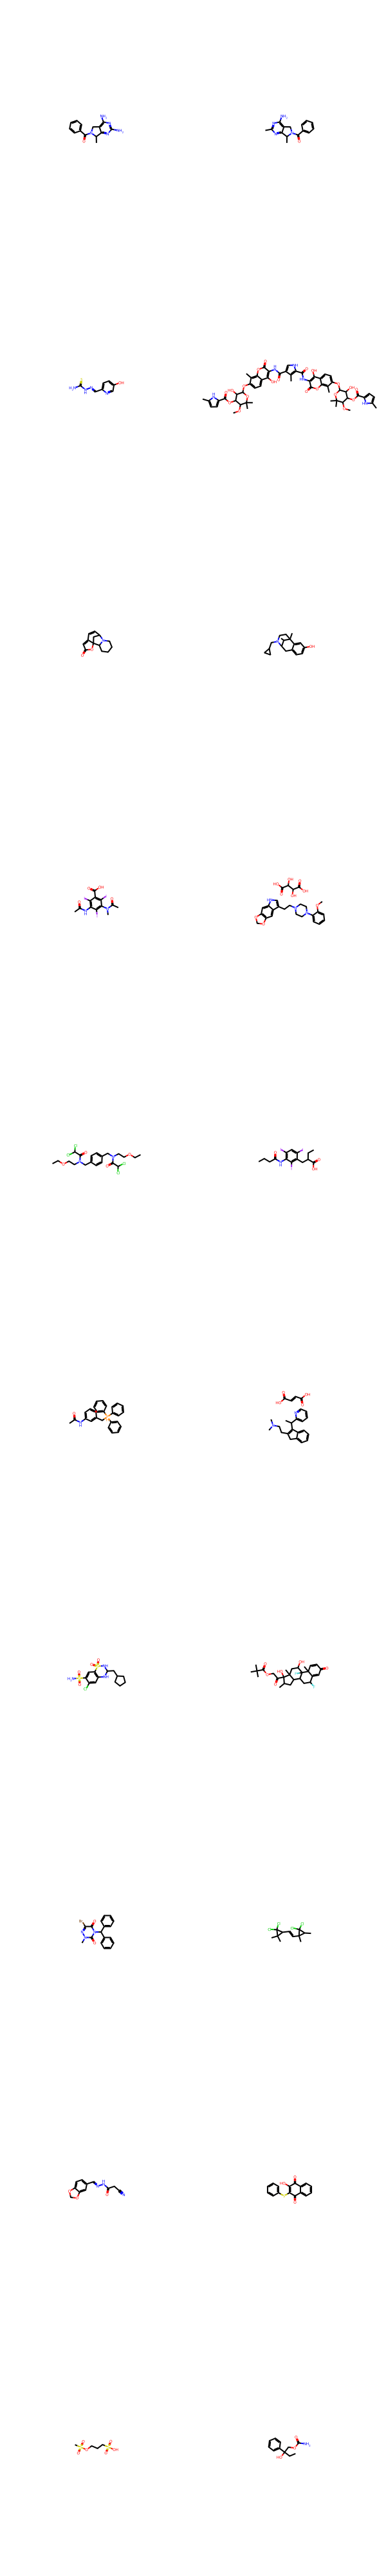

In [11]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw


# Extract the first 50 SMILES strings
first_50_smiles = data["smiles"].head(20)

# Convert SMILES strings to RDKit molecules
molecules = [Chem.MolFromSmiles(smiles) for smiles in first_50_smiles]

# Draw molecules with larger size
img = Draw.MolsToGridImage(molecules, molsPerRow=2, subImgSize=(300,400))  # Adjust subImgSize as needed
img